<a href="https://colab.research.google.com/github/Leticiapp/MVP_Machine_Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MVP de Machine Learning e Analytics**

Pontifícia Universidade Católica do Rio de Janeiro

Curso: Ciência de Dados e Analytics

Aluno: Leticia Paumer

## **1. Definição do Problema**

Para o desenvolvimento do MVP foi utilizado um conjunto de dados que contém informações sobre diversos fatores que afetam a qualidade da água.
O objetivo do projeto é criar um modelo de machine learing que, dada informações sobre determinada amostra de água, possa prever se a ela é potável ou não.

O dataset conta com 3276 registros e 10 colunas, sendo elas:

1. **pH**: pH da água (medido em unidades de pH).

2. **Hardness**: Dureza da água (medida em mg/L).

3. **Solids**: Sólidos totais dissolvidos na água (medidos em ppm).

4. **Chloramines**: Quantidade de cloraminas na água (medida em ppm).

5. **Sulfate**: Quantidade de sulfato na água (medida em mg/L).

6. **Conductivity**: Condutividade da água (medida em μS/cm).

7. **Organic_carbon**: Quantidade de carbono orgânico na água (medida em ppm).

8. **Trihalomethanes**: Quantidade de trihalometanos na água (medida em μg/L).

9. **Turbidity**: Turbidez da água (medida em NTU).

10. **Potability**: Potabilidade da água (1 indica potável, 0 indica não potável).


A fonte original do dataset está disponível em: https://www.kaggle.com/datasets/nayanack/water-probability

In [54]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Imports de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier


In [55]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## **2. Carga dos Dados**

Para carregar o dataset do projeto, é utilizado o pacote Pandas (Python Data Analysis Library).

In [56]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/Leticiapp/MVP_Machine_Learning/main/data/water_potability.csv"

# Colunas do dataset
colunas = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Leitura do arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [57]:
# Visualização das primeiras linhas do dataset
dataset.head(10)

pH    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

## **3. Análise de Dados**

### **3.1 Estatísticas Descritivas**

In [58]:
#Dimensões do dataset (linhas x colunas)
dataset.shape

(3276, 10)

Podemos observar que o datset gerado possui 3276 linhas e 10 colunas, indicando que os registros foram importados da forma esperada.

In [59]:
#Quantidade de registros em cada coluna do dataset
dataset.count()

pH                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

Analisando a quatidade de registros em cada coluna, vemos que há presença de missings das colunas "pH", "Sulfate" e "Trihalomethanes", os quais devem ser tratados posteriormente.

In [60]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


A partir das informações do dataset, vemos que o tipo de dado de cada campo foi importado corretamente, sendo os nove primeiros campos float64 e o campo de potabilidade int64.

In [61]:
#Geração do resumo estatístico do dataset
#Visualização de média (mean), desvio padrão (std), mínimo (min), máximo (max) e os quartis para cada atributo
dataset.describe()

pH     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [62]:
# distribuição do atributo Potability
print(dataset.groupby('Potability').size())

Potability
0    1998
1    1278
dtype: int64


Observando a distribuição do atributo de potabilidade, observamos que os registros do dataset estão balanceados, onde 1998 são do tipo 0 (não potável) e 1278 são do tipo 1 (potável).

### **3.2 Visualizações Unimodais**

Nessa seção iremos analisar individualmente cada atributo do conjunto de dados de forma gráfica.

#### **3.2.1 Histograma e Gráfico de Densidade**

Inicialmente, para a visualização de cada atributo do dataset, iremos gerar histogramas e gráficos de densidade.

Ao observar os gráficos gerados vemos que, com exceção do atributo de potabilidade, as demais colunas possuem uma distribuição aproximadamente normal.

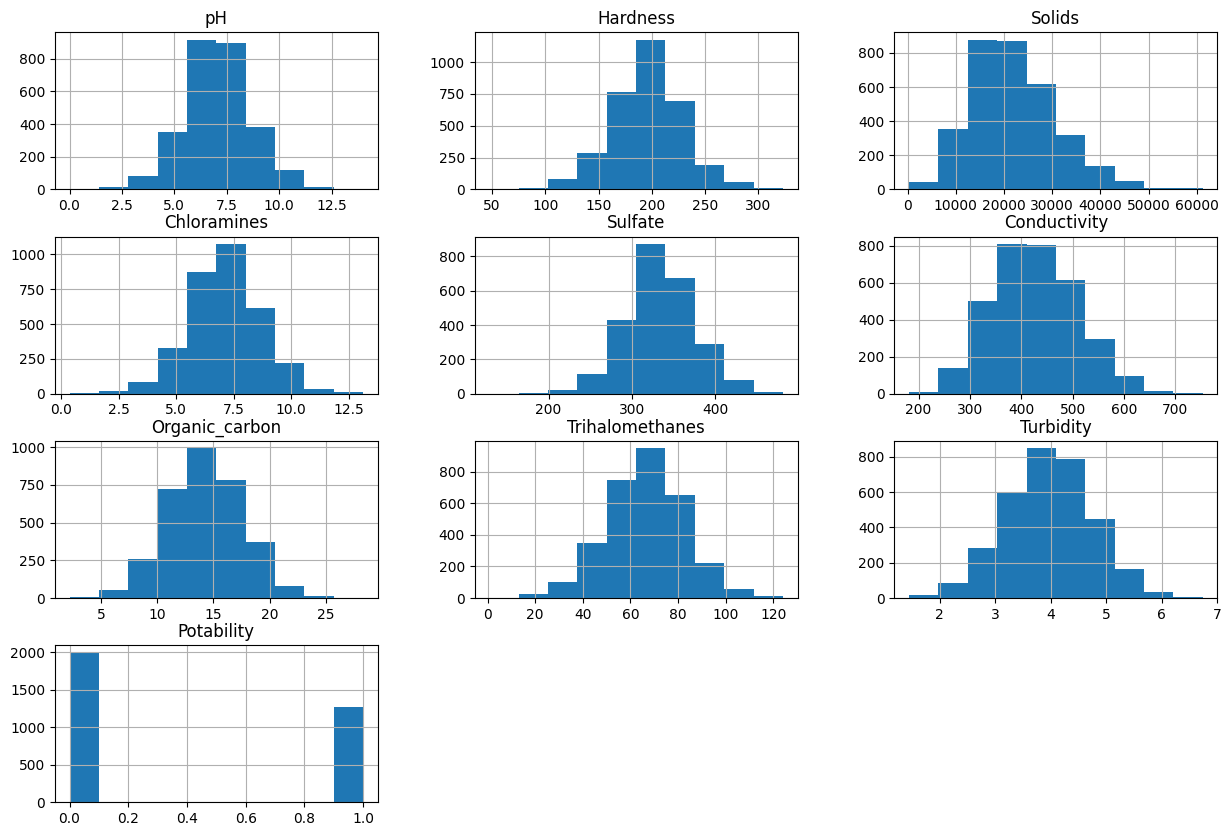

In [63]:
#Histograma geral
dataset.hist(figsize = (15,10))
plt.show()

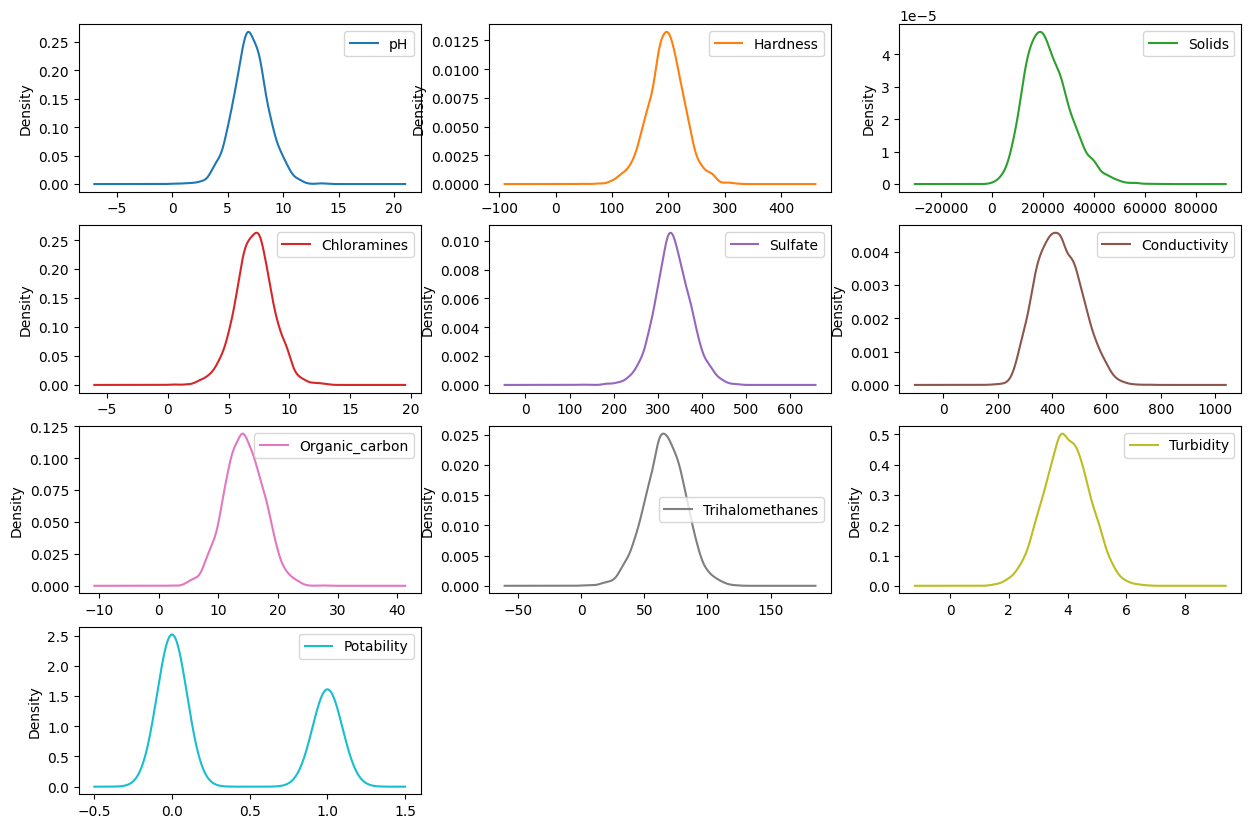

In [64]:
#Gráfico de densidade
dataset.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

#### **3.2.2 Box Plot**

Em seguida, geraremos um Box Plot para observar a distribuição dos dados numéricos e identificar possíveis valores atípicos (outliers).


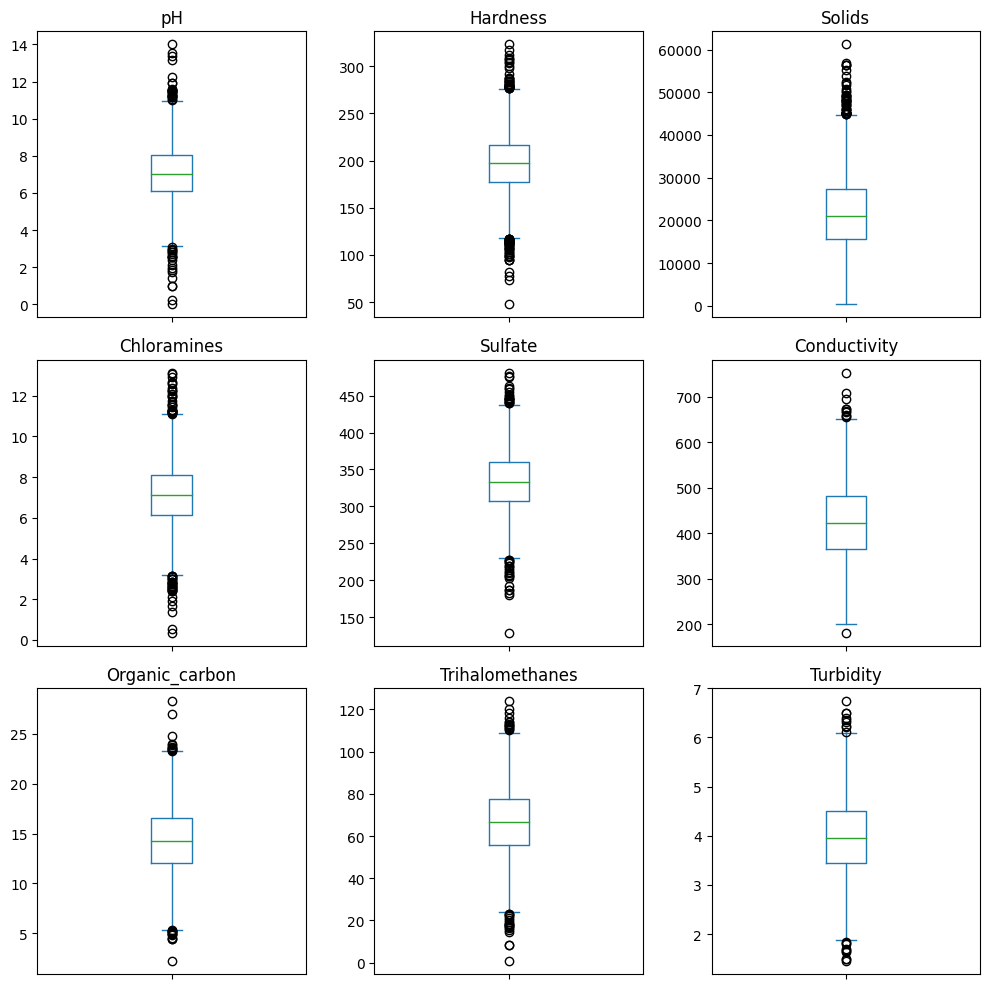

In [65]:
#Box Plot
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    dataset.iloc[:,i].plot(kind = 'box', ax=ax)
    ax.set_title(colunas[i])
    ax.grid(False)
    ax.tick_params(axis='x', labelbottom=False)
plt.tight_layout()

Analisando o Box Plot gerado, vemos a presença de diversos outliers em todos os atributos do dataset, os quais devem ser tratados posteriormente.

### **3.3. Visualizações Multimodais**

Nessa seção iremos analisar, a partir visualizações gráficas, as relações entre dois ou mais atributos.

#### **3.3.1 Matriz de Correlação**

A seguir, iremos gerar matriz de correlação dos atributos do dataset.

Uma matriz de correlação é uma tabela que mostra os coeficientes de correlação entre muitas variáveis. Cada célula da matriz representa a correlação entre duas variáveis específicas. A correlação é uma medida estatística que indica a extensão em que duas variáveis estão relacionadas entre si

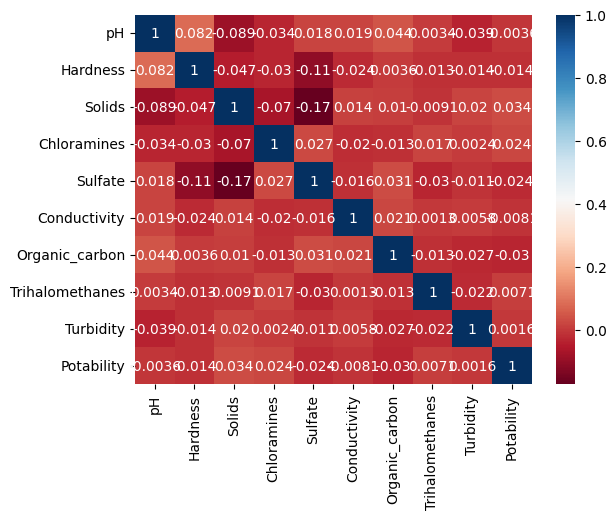

In [66]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

#### **3.3.2 Scatter Plot**

A seguir, iremos gerar um scatter plot para cada par de variáveis do dataset, agrupando pela potabilidade da água.

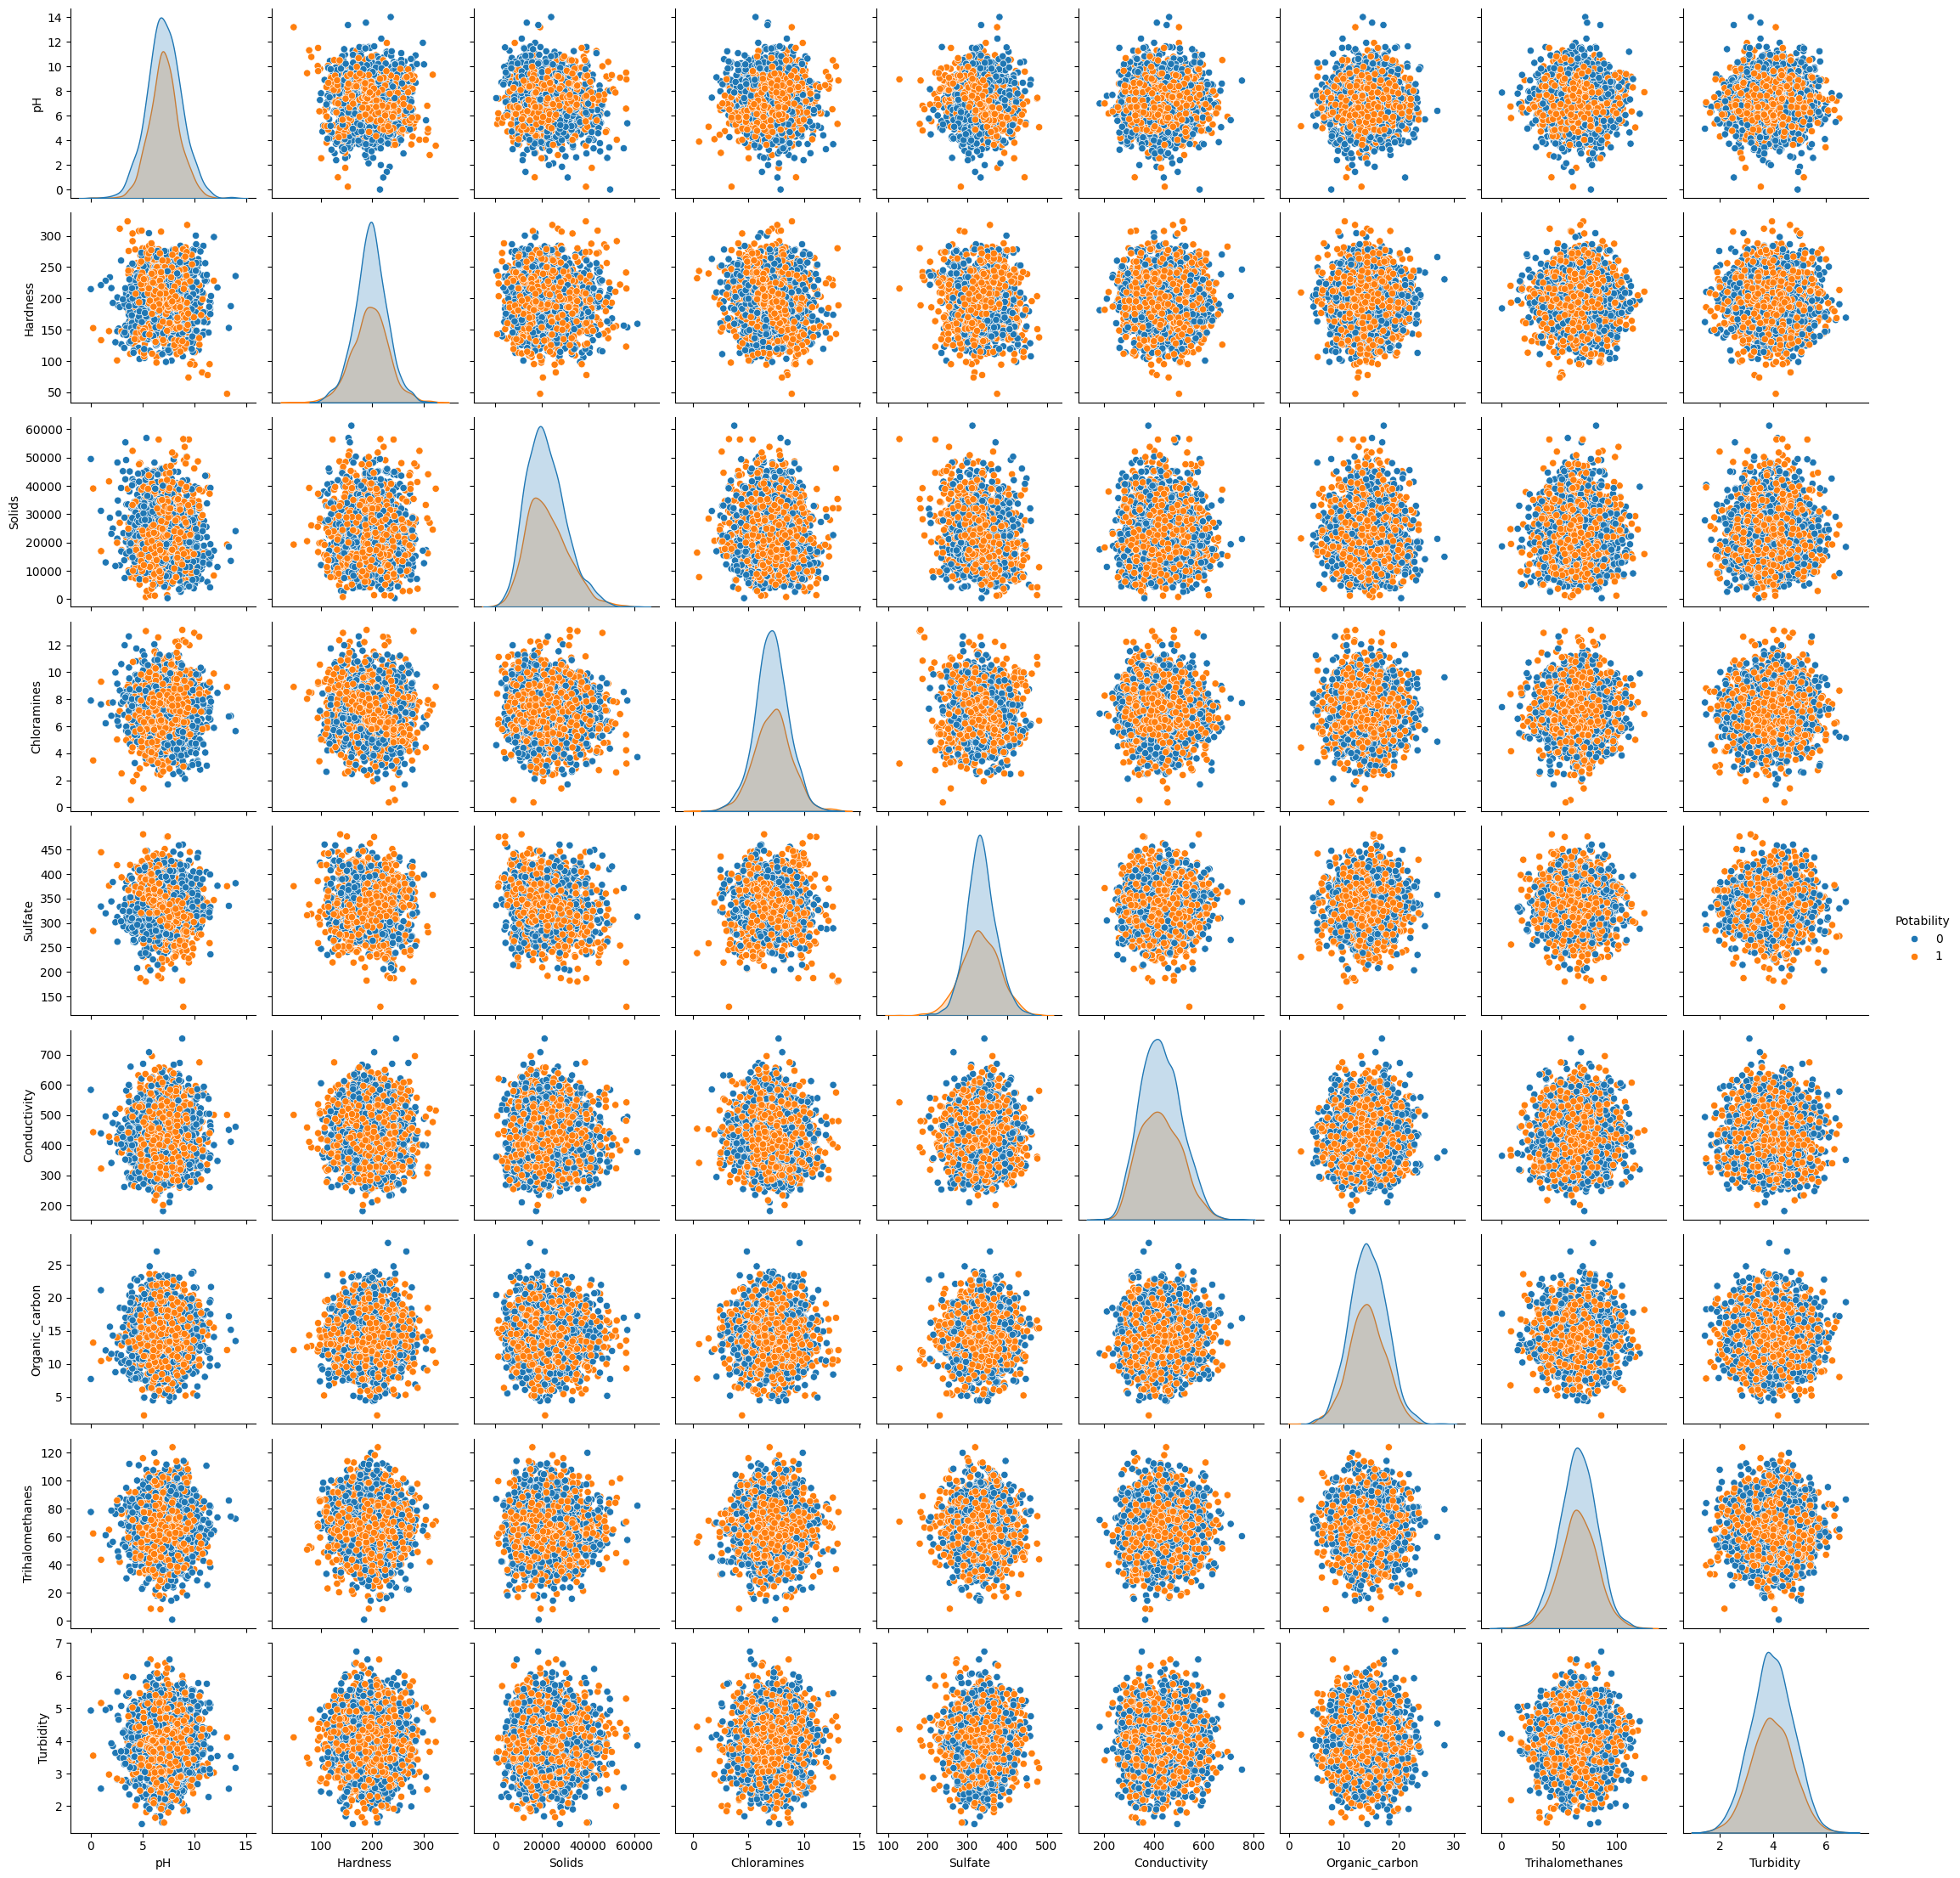

In [67]:
#Scatter Plot com Seaborn
sns.pairplot(dataset, hue = "Potability", height = 2.5);

## **4. Pré-Processamento de Dados**

Na etapa de pré-processamento, iremos realizar diversas operações de limpeza, tratamento, transformações e preparação dos dados.

### **4.1. Tratamento de Missings e Limpeza**

A primeira operação de pré-processamento que será realizada é o tratamento dos missings existentes no dataset. Como observado anteriormente, os atributos "pH", "Sulfate" e "Trihalomethanes" possuem diversos valores faltantes.

In [68]:
#verificando a existência de nulls no dataset
dataset.isnull().sum()

pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

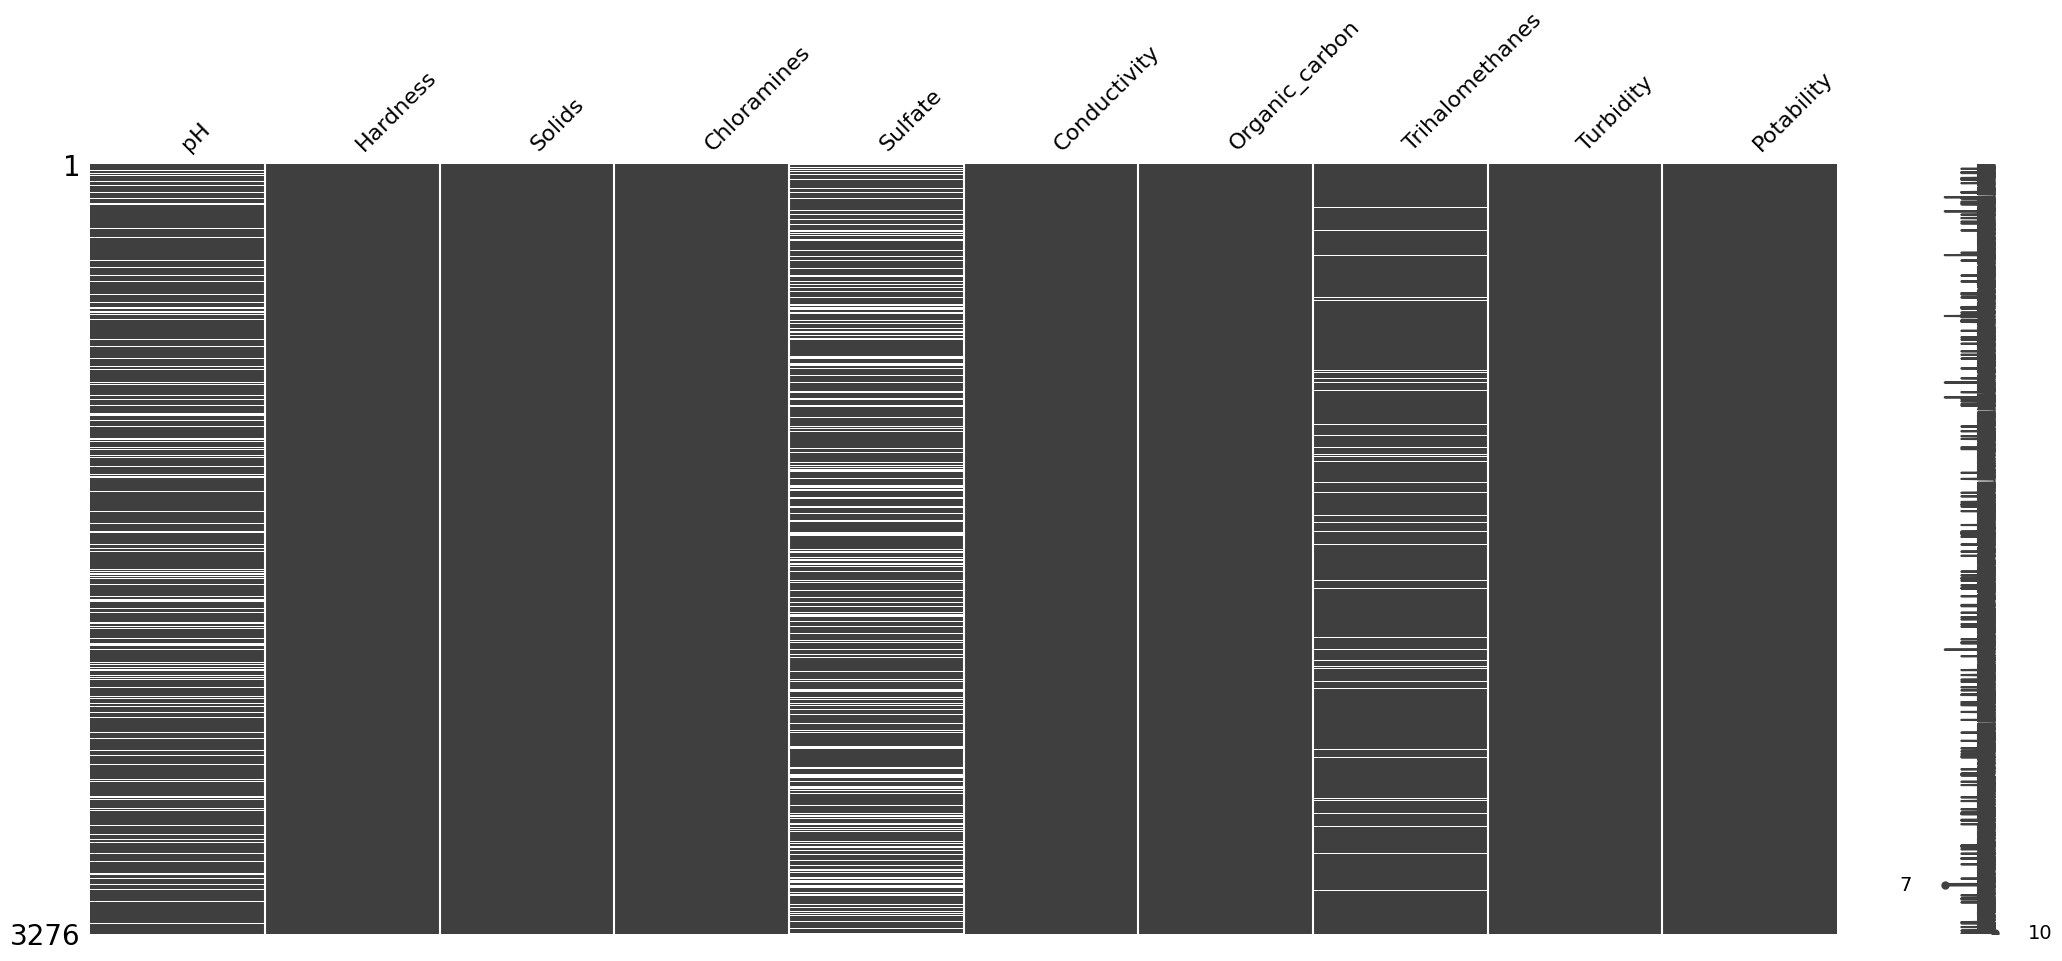

In [69]:
#exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset)

Para realizar o tratamento desses valores faltantes, iremos substituir os valores missings pela mediana do campo agrupando pela potabilidade, assim mantendo o valor o mais próximo possível dos demais valores de sua classe.

In [70]:
#Criação de um novo dataset para não sobescrever o dataset original
dataset_final = dataset.copy()

#Substituindo os valores missings pela mediana do campo, agrupando pela sua classe (Potabilidade)
dataset_final["pH"] = dataset_final.groupby("Potability")["pH"].transform(lambda x: x.fillna(x.median()))
dataset_final["Sulfate"] = dataset_final.groupby("Potability")["Sulfate"].transform(lambda x: x.fillna(x.median()))
dataset_final["Trihalomethanes"] = dataset_final.groupby("Potability")["Trihalomethanes"].transform(lambda x: x.fillna(x.median()))


In [71]:
#Verifica novamente a existência de nulls
dataset_final.isnull().sum()

pH                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

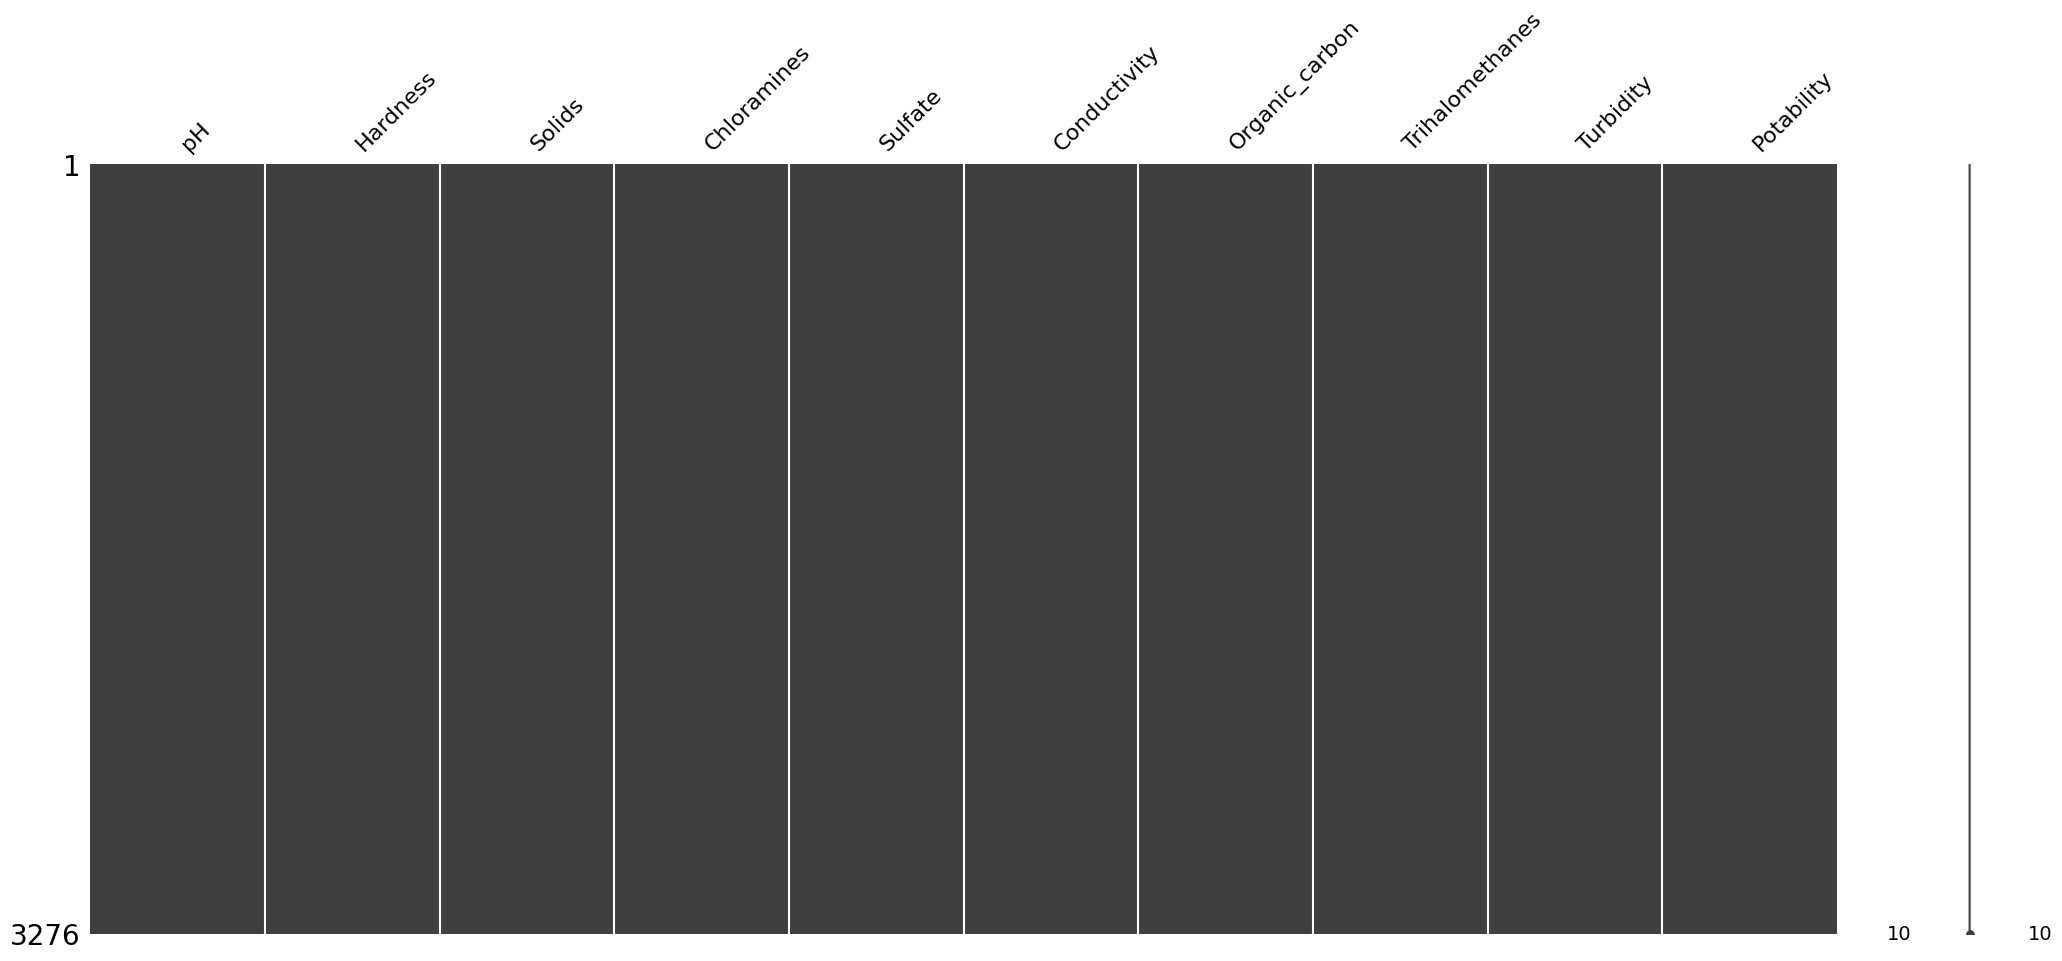

In [72]:
#exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset_final)

### **4. 2. Tratamento de Outliers**

Como observado anteriormente na etapa de análise, os dados possuem diversos outliers em seus campos. Necessitamos tratar esses valores atípicos para que o resultado do modelo não seja afetado.

Para isso, iremos substituir os outliers pela mediana da mesma coluna e agrupando pela potabilidade, para manter o valor o mais próximo possível dos demais valores de sua classe.

In [73]:
#Função para substituir todos os valores que forem 3x maiores que o desvio padrão (outliers) pela mediana
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = group.median()
    return group

dataset_final['aux'] = dataset_final['Potability']
dataset_final = dataset_final.groupby('aux').transform(replace)

In [74]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pH               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Após a remoção dos outliers, geraremos novamente o box plot do dataset. Podemos observar que os outliers mais distantes presentes no box plot na etapa de análise não estão mais presentes.

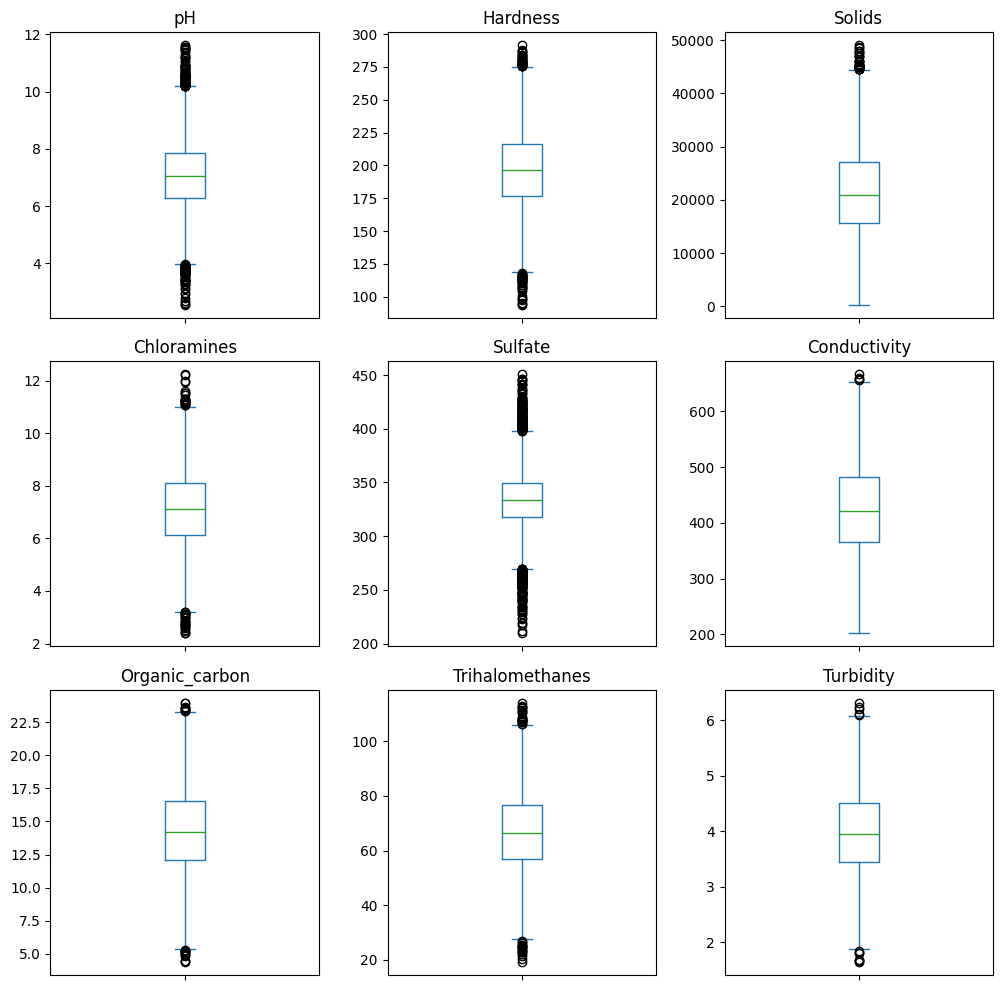

In [75]:
#Box Plot
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    dataset_final.iloc[:,i].plot(kind = 'box', ax=ax)
    ax.set_title(colunas[i])
    ax.grid(False)
    ax.tick_params(axis='x', labelbottom=False)
plt.tight_layout()

### **4. 3. Seleção de Atributos (Feature Selection)**

Nesta etapa, faremos a seleção dos atributos que serão utilizados para o treinamento do modelo. A seleção de características é importante para reduzir a dimensionalidade dos dados, melhorar a generalização do modelo, reduzir o tempo de treinamento e evitar overfitting.
Utilizaremos três conjuntos de atributos para treinamento:

1. Todos os atributos do dataset.

2. Seleção de atributos utilizando **SelectKBest** (seleciona as k melhores características com base em testes estatísticos univariados).

3. Seleção de atributos utilizando **Eliminação Recursiva** (remoção iterativa das características menos importantes do conjunto de dados).

Ao final do projeto, serão comparadas as performances do modelo de cada conjunto de atributos.

In [76]:
# Separação de atributos e classe
array = dataset_final.values
X = array[:,0:9] # atributos
y = array[:,9] # classe (target)

In [77]:
# SelectKBest

# Seleção de atributos com SelectKBest
# Selecionando 6 atributos entre os 9 presentes no dataset (k=6)
best_var = SelectKBest(score_func=f_classif, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
xSKB = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', xSKB.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:9])

# Exibe as pontuações de cada atributos e os 6 escolhidos (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:9]))



Número original de atributos: 9

Número reduzido de atributos: 6

Atributos Originais: Index(['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Scores dos Atributos Originais: [0.024 1.108 3.296 1.387 1.197 0.214 2.232 0.108 0.005]

Atributos Selecionados: ['Hardness' 'Solids' 'Chloramines' 'Sulfate' 'Conductivity'
 'Organic_carbon']


In [78]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Selecionando 6 atributos entre os 9 presentes no dataset (n_features_to_select=6)
rfe = RFE(modelo, n_features_to_select=6)
fit = rfe.fit(X, y)

# Reduz X para os atributos selecionados
xERA = fit.fit_transform(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:9])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:9]))


Atributos Originais: Index(['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Atributos Selecionados: [ True  True False  True  True False  True False  True]

Ranking de atributos: [1 1 4 1 1 3 1 2 1]

Qtd de melhores Atributos: 6

Nomes dos Atributos Selecionados: ['pH' 'Hardness' 'Chloramines' 'Sulfate' 'Organic_carbon' 'Turbidity']


Após a execução dos algoritmos de feature selection, temos X com os valores de todos os atributos, xSKB com os valores dos atributos selecionados pelo SelectKBest e xERA com os valores dos atributos selecionados pela Eliminação Recursiva.

## **5. Modelagem**



  Nesta seção iniciaremos o desenvolvimento e a execução dos modelos e ensembles de machine learning escolhidos para o projeto.
  
Os modelos selecionados para este projeto são:
  
  1. **Regressão Logística**:  modelo utilizado para prever a probabilidade de ocorrência de um evento, como classificação binária, com base em variáveis independentes. Ele modela a relação entre as características e a probabilidade de um resultado pertencer a uma classe específica usando uma função logística.

  2. **KNN** (k-Nearest Neighbors): algoritmo que classifica ou faz regressão em um ponto de dados com base na classe ou valor médio dos k pontos de dados mais próximos no conjunto de treinamento.

  3. **Árvore de Decisão**: algoritmo que divide os dados em subgrupos com base nas características, construindo uma estrutura hierárquica de decisões para fazer previsões.

  4. **Naive Bayes**: algoritmo baseado no Teorema de Bayes, ele assume independência entre as características e calcula a probabilidade de uma amostra pertencer a uma classe específica com base nas probabilidades condicionais das características dadas as classes.

  4. **SVM**: As Máquinas de Vetores de Suporte (SVM) são algoritmos que procuram encontrar o hiperplano que melhor separa os pontos de dados em classes diferentes (no caso da classificação) ou que melhor se ajusta aos dados (no caso da regressão), maximizando a margem entre os pontos de dados e o hiperplano.

  5. **SGD** (Gradiente Descendente Estocástico): algoritmo que atualiza iterativamente os parâmetros do modelo na direção oposta ao gradiente da função de custo, com base em mini-lotes aleatórios de dados.


 E as ensembles selecionadas são:

 1. **Bagging** (Bootstrap Aggregating): técnica de ensemble learning em que vários modelos de aprendizado de máquina são treinados em subconjuntos aleatórios dos dados de treinamento, com substituição. Cada modelo é treinado de forma independente e, em seguida, suas previsões são combinadas por votação ou média para obter uma previsão final.

 2. **Random Forest**: algoritmo de aprendizado de máquina baseado em ensemble learning que combina múltiplas árvores de decisão em um único modelo. Cada árvore de decisão é treinada de forma independente em um subconjunto aleatório dos dados de treinamento e usando um subconjunto aleatório das características. As previsões das árvores individuais são então combinadas por votação ou média para produzir uma previsão final.

 3. **Gradient Boosting**: técnica de ensemble learning que combina vários modelos de aprendizado fracos, geralmente árvores de decisão, para formar um modelo forte. A ideia principal é treinar cada modelo de forma sequencial, onde cada novo modelo corrige os erros do modelo anterior.

 4. **Voting**: técnica de ensemble learning que combina as previsões de vários modelos de machine learning para produzir uma previsão final.

### **5.1. Validação Cruzada**

Neste projeto, como o conjunto de dados é pequeno e a divisão dos dados pode ter um grande impacto no desempenho do modelo, utilizaremos a tecnica de validação cruzada para ajudar a garantir que o desempenho do modelo seja robusto e não dependa da forma como os dados são divididos em conjuntos de treinamento e teste. Abaixo serão definidos os parâmetros da validação cruzada.

In [79]:
#Parâmetros e partições da validação cruzada

seed = 10 # semente aleatória, garante que todas as execuções utilizem a mesma seed
num_particoes = 10 # para o problema em questão 10 é o número que partições mais adequado
scoring = 'accuracy'

kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

 A estratificação é um método que assegura a representação equilibrada de diferentes grupos ou classes em conjuntos de dados, garantindo que todas as categorias sejam adequadamente representadas durante a divisão dos dados em conjuntos de treinamento e teste.

### **5.2. Funções para avaliação de modelos e ensembles**

Como descrito anteriormente, serão avaliados modelos utilizando três diferentes seleções de atributos. Por essa razão, iremos definir abaixo funções que calculam a acurácia dos modelos e dos ensembles, para utiliza-las posteriormente nas avaliações.

In [80]:
#Modelos

def avalia_modelos(X_train, y_train):
  np.random.seed(7) # definindo uma semente global

  # Lista que armazenará os modelos
  models = []
  results = []
  names = []

  # Criando os modelos e adicionando-os na lista de modelos
  models.append(('LR', LogisticRegression(max_iter=200)))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('SVM', SVC()))
  models.append(('SGD', SGDClassifier()))

  # Avaliando um modelo por vez
  for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure()
  fig.suptitle('Comparação da Acurácia dos Modelos')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()

In [81]:
#Ensembles

def avalia_ensembles(X_train, y_train):
  np.random.seed(7)

  ensembles = []
  results = []
  names = []

  #parametros para os ensembles
  num_trees = 100
  max_features = 3

  #BaggingClassifier: o modelo que será utilizado pelo bagging é a árvore de decisão
  base = DecisionTreeClassifier()
  ensembles.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))

  #RandomForest
  ensembles.append(('RFC', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

  #GradientBoosting
  ensembles.append(('GB', GradientBoostingClassifier(n_estimators=num_trees, max_features=max_features)))

  #VotingClassifier: os modelos que serão utilizados pelo voting são regressão logistica, svm e árvore de decisão
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))
  ensembles.append(('Voting', VotingClassifier(bases)))

  # Avaliando um ensemble por vez
  for name, ensemble in ensembles:
    cv_results = cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure()
  fig.suptitle('Comparação da Acurácia dos Ensembles')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names)
  plt.show()

### **5.3. Funções para avaliação de Pipelines, Dados Padronizados e Normalizados**

Pipelines, padronização e normalização de dados são técnicas de preparação do dados para modelagem em aprendizado de máquina, que ajudam a garantir que os modelos sejam treinados com dados consistentes e bem ajustados. Neste projeto, também faremos a avalização dos modelos utilizando esses técnicas.

Temos abaixo uma breve descrição do funcionamento desses métodos:

**Pipelines**: Pipelines são sequências de etapas de pré-processamento e modelagem que são executadas de forma encadeada. Eles ajudam a organizar o fluxo de trabalho de pré-processamento e modelagem, garantindo que cada etapa seja executada de maneira ordenada e eficiente.

**Padronização de Dados**: A padronização de dados é um método de pré-processamento que transforma os dados de forma que tenham uma média zero e um desvio padrão unitário. Isso significa que os dados são ajustados para que tenham uma distribuição normal com média zero e variância unitária.

**Normalização de Dados**: A normalização de dados é um método de pré-processamento que redimensiona os dados para um intervalo específico, geralmente entre 0 e 1. Isso é feito dividindo cada valor pelo valor máximo da característica.





 Em seguida, temos a defição das funções os que implementam.

In [82]:
# [MODELOS] Pipelines, dados padronizados e normalizados

def avalia_pipelines_modelos(X_train, y_train):
  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []


  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  reg_log = ('LR', LogisticRegression(max_iter=200))
  knn = ('KNN', KNeighborsClassifier())
  cart = ('CART', DecisionTreeClassifier())
  naive_bayes = ('NB', GaussianNB())
  svm = ('SVM', SVC())
  sgd = ('SGD', SGDClassifier())

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('LR-orig', Pipeline([reg_log])))
  pipelines.append(('KNN-orig', Pipeline([knn])))
  pipelines.append(('CART-orig', Pipeline([cart])))
  pipelines.append(('NB-orig', Pipeline([naive_bayes])))
  pipelines.append(('SVM-orig', Pipeline([svm])))
  pipelines.append(('SGD-orig', Pipeline([sgd])))

  # Dataset Padronizado
  pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
  pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
  pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
  pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
  pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
  pipelines.append(('SGD-padr', Pipeline([standard_scaler, sgd])))

  # Dataset Normalizado
  pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
  pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
  pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
  pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
  pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
  pipelines.append(('SGD-norm', Pipeline([min_max_scaler, sgd])))

  # Executando os pipelines
  for name, model in pipelines:
      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

In [83]:
# [ENSEMBLES] Pipelines, dados padronizados e normalizados

def avalia_pipelines_ensembles(X_train, y_train):
  np.random.seed(7) # definindo uma semente global para este bloco

  # Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
  pipelines = []
  results = []
  names = []

  #parametros para os ensembles
  num_trees = 100
  max_features = 3
  base = DecisionTreeClassifier()
  bases = []
  model1 = LogisticRegression(max_iter=200)
  bases.append(('logistic', model1))
  model2 = DecisionTreeClassifier()
  bases.append(('cart', model2))
  model3 = SVC()
  bases.append(('svm', model3))

  # Criando os elementos do pipeline

  # Algoritmos que serão utilizados
  bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
  random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
  gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
  voting = ('Voting', VotingClassifier(bases))

  # Transformações que serão utilizadas
  standard_scaler = ('StandardScaler', StandardScaler())
  min_max_scaler = ('MinMaxScaler', MinMaxScaler())


  # Montando os pipelines

  # Dataset original
  pipelines.append(('Bag-orig', Pipeline([bagging])))
  pipelines.append(('RF-orig', Pipeline([random_forest])))
  pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
  pipelines.append(('Vot-orig', Pipeline([voting])))

  # Dataset Padronizado
  pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
  pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
  pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
  pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

  # Dataset Normalizado
  pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
  pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
  pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
  pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

  # Executando os pipelines
  for name, ensemble in pipelines:
      cv_results = cross_val_score(ensemble, X_train, y_train, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      msg = "%s: %.6f (%.6f)" % (name, cv_results.mean(), cv_results.std())
      print(msg)

  # Boxplot de comparação dos modelos
  fig = plt.figure(figsize=(25,6))
  fig.suptitle('Comparação dos Ensembles - Dataset orginal, padronizado e normalizado')
  ax = fig.add_subplot(111)
  plt.boxplot(results)
  ax.set_xticklabels(names, rotation=90)
  plt.show()

### **5. 4. Avaliação dos Modelos**

#### **5. 4. 1. Avaliação com os atributos originais**

Inicialmente, iremos avaliar o desempenho do modelo utilizando todos os atributos do dataset.

In [84]:
# Separação dos dados de treino e teste

test_size = 0.20 # tamanho do conjunto de teste, 20% dos dados irão para o conjunto de teste
seed = 10 # semente aleatória

# X = atributos originais do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


LR: 0.609924 (0.001527)
KNN: 0.562977 (0.033416)
CART: 0.734733 (0.039008)
NB: 0.624427 (0.014302)
SVM: 0.609924 (0.001527)
SGD: 0.500763 (0.109932)


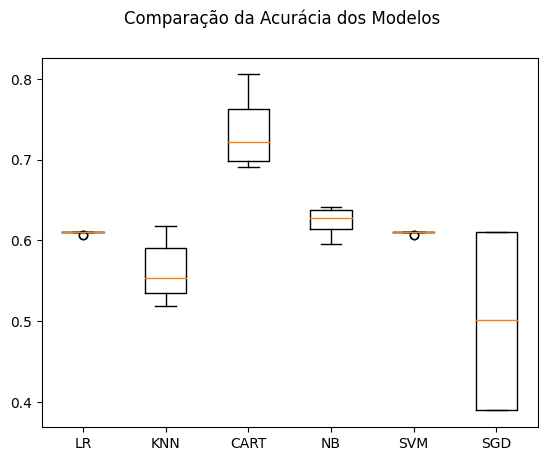

In [85]:
#Avaliação de desempenho dos modelos

avalia_modelos(X_train, y_train)

Analisando os resultados de acurácia dos modelos, vemos que nesse caso o modelo com melhor desempenho é a árvore de decisão com aproximadamente 73% de acurácia. E os modelos com os piores desempenhos foram o SGD com aproximadamente 50% e o KNN com aproximadamente 56%. O SGD também apresentou o maior devio padrão entre todos os modelos.

Bagging: 0.777099 (0.027375)
RFC: 0.788931 (0.034055)
GB: 0.792366 (0.038214)
Voting: 0.609924 (0.001527)


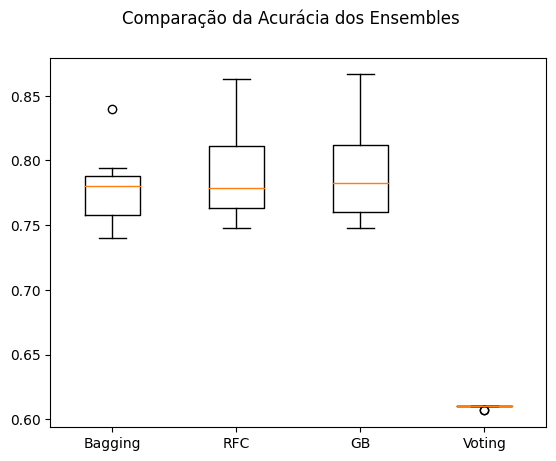

In [86]:
#Avaliação de desempenho dos ensembles

avalia_ensembles(X_train, y_train)

Todos os ensembles, com exceção do Voting, obtiveram uma alta porcentagem de acurácia. O Random Forest e o Gradient Boosting obtiveram os melhores desempenhos.

LR-orig: 0.609924 (0.001527)
KNN-orig: 0.562977 (0.033416)
CART-orig: 0.734733 (0.039008)
NB-orig: 0.624427 (0.014302)
SVM-orig: 0.609924 (0.001527)
SGD-orig: 0.500763 (0.109932)
LR-padr: 0.609924 (0.001527)
KNN-padr: 0.620992 (0.025031)
CART-padr: 0.739313 (0.041110)
NB-padr: 0.624809 (0.016287)
SVM-padr: 0.670229 (0.017424)
SGD-padr: 0.574809 (0.030448)
LR-norm: 0.609924 (0.001527)
KNN-norm: 0.617557 (0.023824)
CART-norm: 0.734733 (0.029724)
NB-norm: 0.624809 (0.016287)
SVM-norm: 0.668702 (0.017640)
SGD-norm: 0.587405 (0.052429)


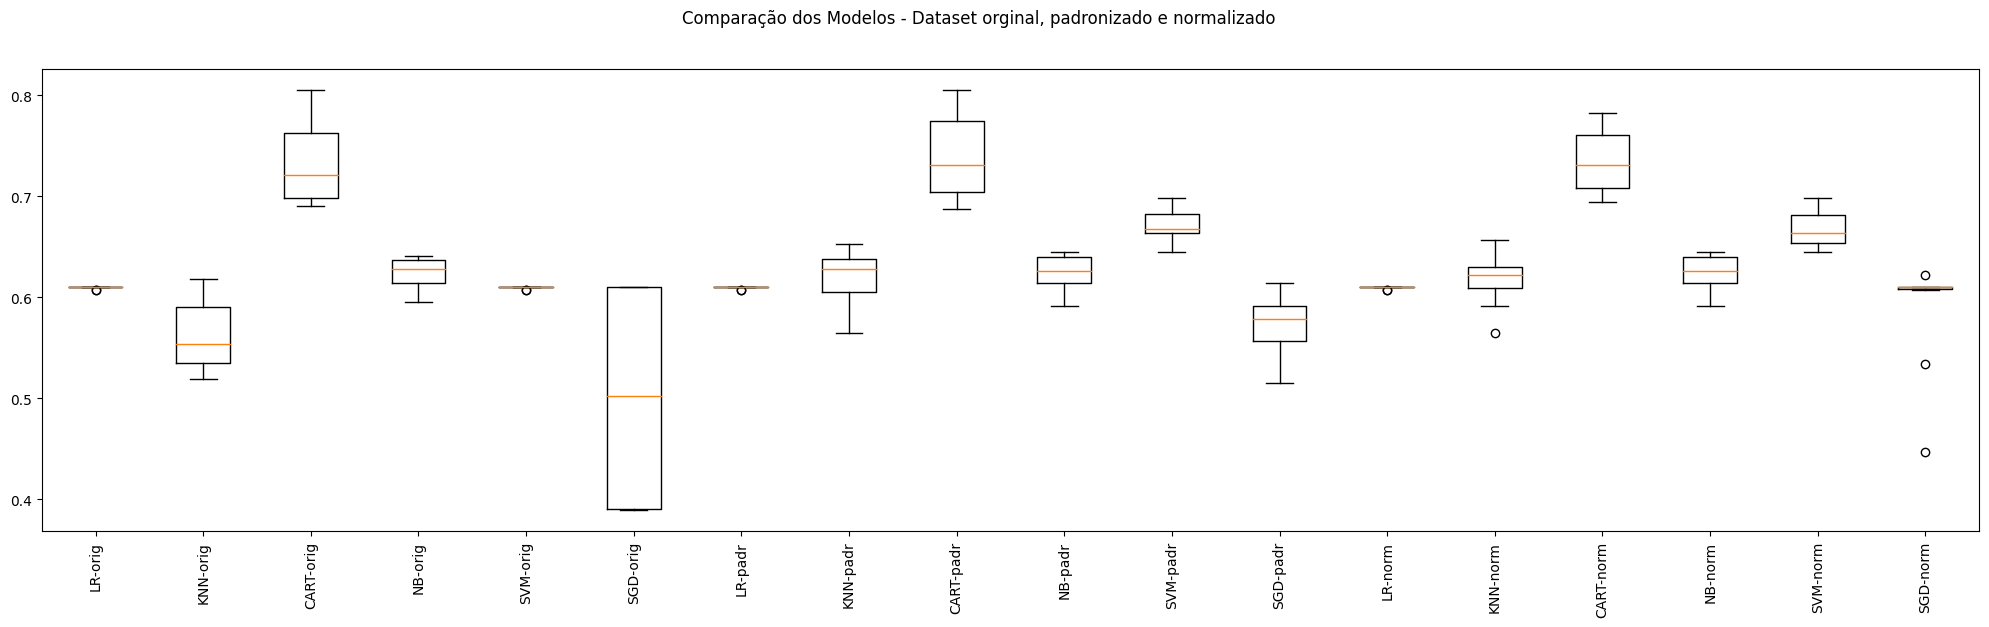

In [87]:
#Avaliação de desempenho das pipelines dos modelos

avalia_pipelines_modelos(X_train, y_train)

O mais notável após a avaliação dos modelos utilizando dados padronizados e normalizados foi uma diminuição marcante no desvio padrão do modelo SGD. Também observamos um aumento na eficácia dos modelos SVM e KNN e uma diminuição no devio padrão dos modelos KNN e Árvore de decisão (apenas na normalização).

Bag-orig: 0.777099 (0.027375)
RF-orig: 0.788931 (0.034055)
GB-orig: 0.794275 (0.030268)
Vot-orig: 0.609924 (0.001527)
Bag-padr: 0.767939 (0.026978)
RF-padr: 0.791221 (0.032747)
GB-padr: 0.794275 (0.030268)
Vot-padr: 0.679008 (0.012711)
Bag-norm: 0.777863 (0.028296)
RF-norm: 0.791221 (0.037047)
GB-norm: 0.794656 (0.030951)
Vot-norm: 0.673282 (0.014504)


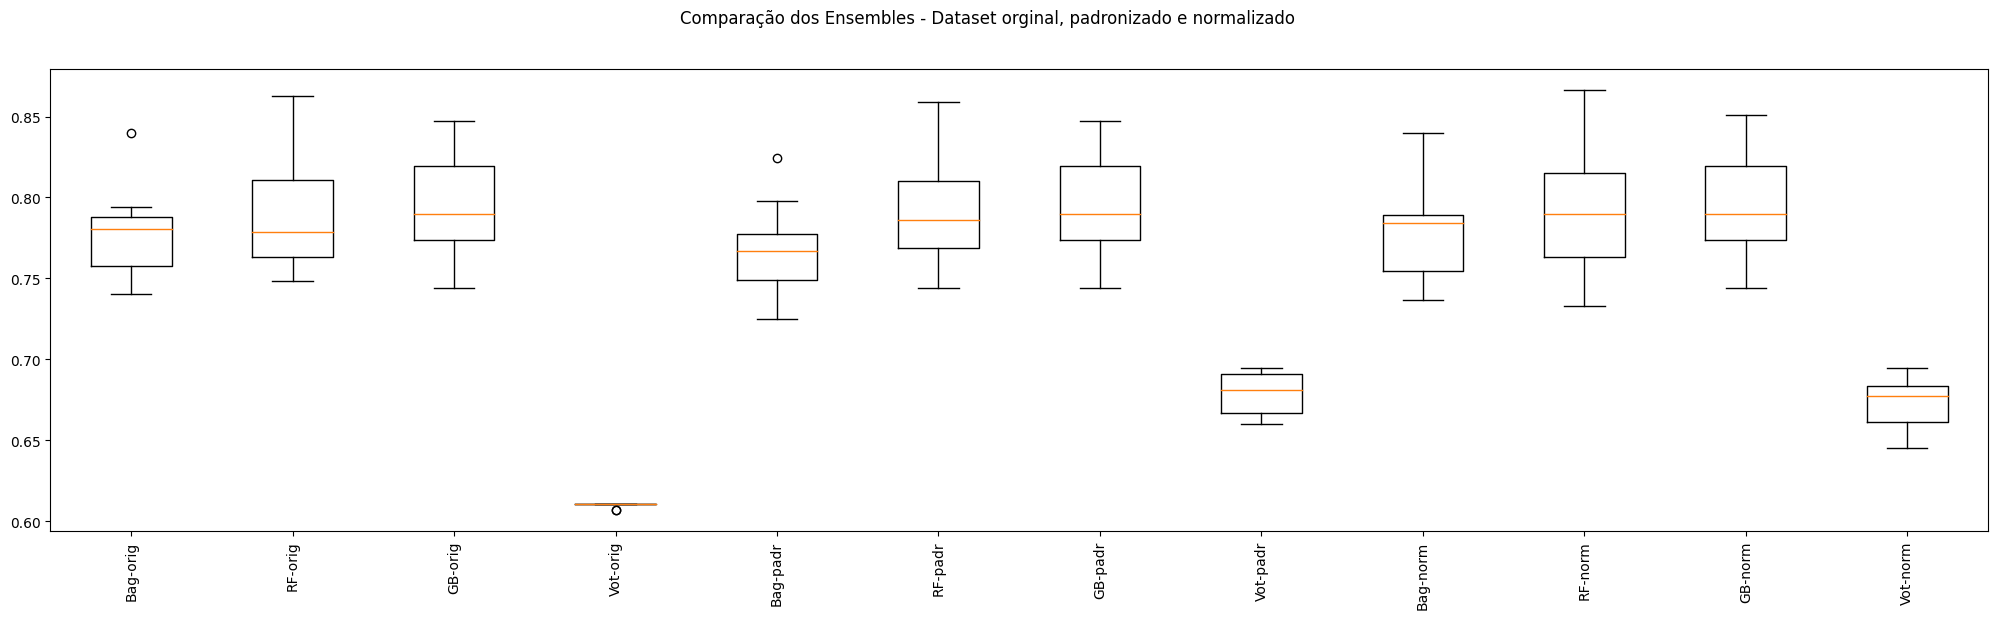

In [88]:
#Avaliação de desempenho das pipelines dos ensembles

avalia_pipelines_ensembles(X_train, y_train)

Obtivemos um aumento na acurácia dos ensembles após a padronização e normalização. O maior aumento foi no algoritmo de Voting.

#### **5. 4. 2. Avaliação com seleção de atributos SelectKBest**

In [89]:
# Separação dos dados de treino e teste

test_size = 0.20 # tamanho do conjunto de teste, 20% dos dados irão para o conjunto de teste
seed = 10 # semente aleatória

# xSKB = atributos selecionados pelo SelectKBest
X_train, X_test, y_train, y_test = train_test_split(xSKB, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

LR: 0.609924 (0.001527)
KNN: 0.563359 (0.033933)
CART: 0.672519 (0.024427)
NB: 0.622901 (0.013951)
SVM: 0.609924 (0.001527)
SGD: 0.479008 (0.107594)


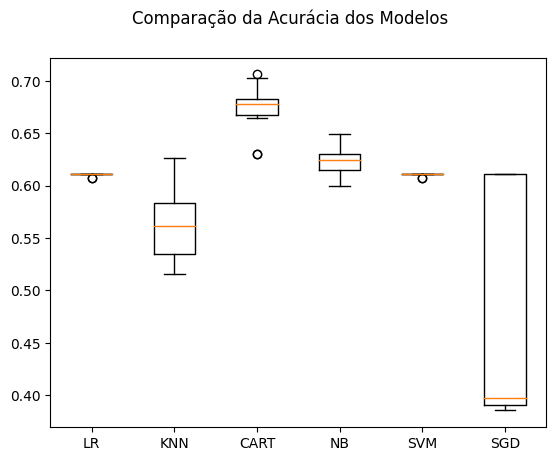

In [90]:
#Avaliação de desempenho dos modelos

avalia_modelos(X_train, y_train)

Inicialmente, podemos observar uma diminuição no desempenho dos modelos em comparação a avalição com os atributos originais do dataset. Utilizando o SelectKBest, o modelo com melhor desempenho foi a Árvore de Decisão com 67% e o pior desempenho foi o SGD com 47%.

Bagging: 0.727099 (0.023606)
RFC: 0.729389 (0.024762)
GB: 0.728626 (0.028839)
Voting: 0.609924 (0.001527)


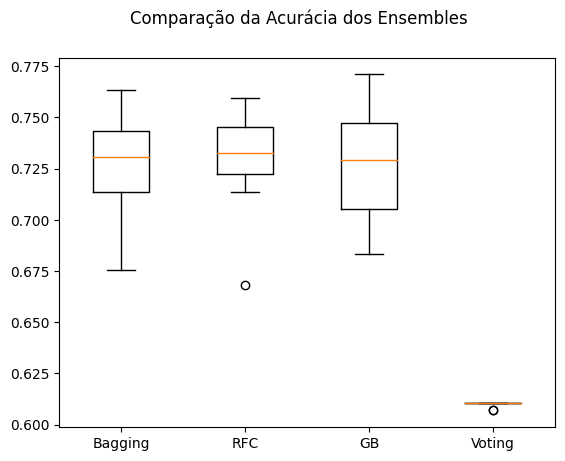

In [91]:
#Avaliação de desempenho dos ensembles

avalia_ensembles(X_train, y_train)

O Voting manteve a mesma perfomance, enquanto os demais ensembles tiveram uma diminuíção no desempenho em comparação aos atributos originais.

LR-orig: 0.609924 (0.001527)
KNN-orig: 0.563359 (0.033933)
CART-orig: 0.672519 (0.024427)
NB-orig: 0.622901 (0.013951)
SVM-orig: 0.609924 (0.001527)
SGD-orig: 0.479008 (0.107594)
LR-padr: 0.609924 (0.001527)
KNN-padr: 0.595802 (0.029290)
CART-padr: 0.677481 (0.023357)
NB-padr: 0.621756 (0.013050)
SVM-padr: 0.650000 (0.013117)
SGD-padr: 0.588168 (0.019421)
LR-norm: 0.609924 (0.001527)
KNN-norm: 0.600000 (0.018838)
CART-norm: 0.673282 (0.019023)
NB-norm: 0.621756 (0.013050)
SVM-norm: 0.648473 (0.011758)
SGD-norm: 0.602290 (0.021510)


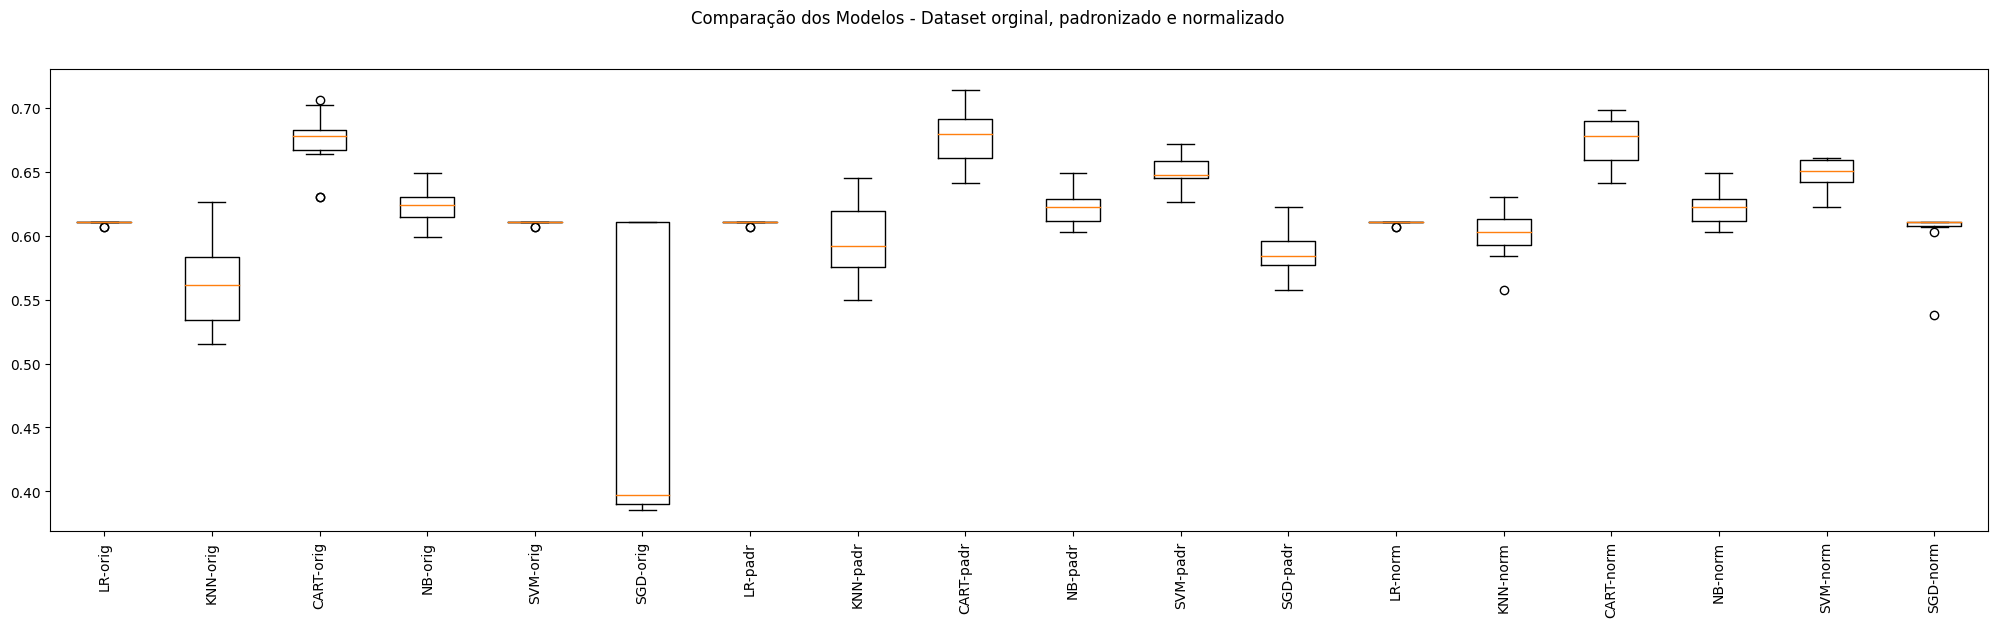

In [92]:
#Avaliação de desempenho das pipelines dos modelos

avalia_pipelines_modelos(X_train, y_train)

Apesar da melhora no desempenho de alguns algoritmos após a normalização/padronização, o desempenho da maioria dos modelos continua inferior a dos atributos originais.

Bag-orig: 0.727099 (0.023606)
RF-orig: 0.729389 (0.024762)
GB-orig: 0.737405 (0.027724)
Vot-orig: 0.609924 (0.001527)
Bag-padr: 0.722901 (0.022593)
RF-padr: 0.729008 (0.027257)
GB-padr: 0.737023 (0.028071)
Vot-padr: 0.643130 (0.012456)
Bag-norm: 0.727481 (0.032034)
RF-norm: 0.726336 (0.023407)
GB-norm: 0.737786 (0.028463)
Vot-norm: 0.641603 (0.014529)


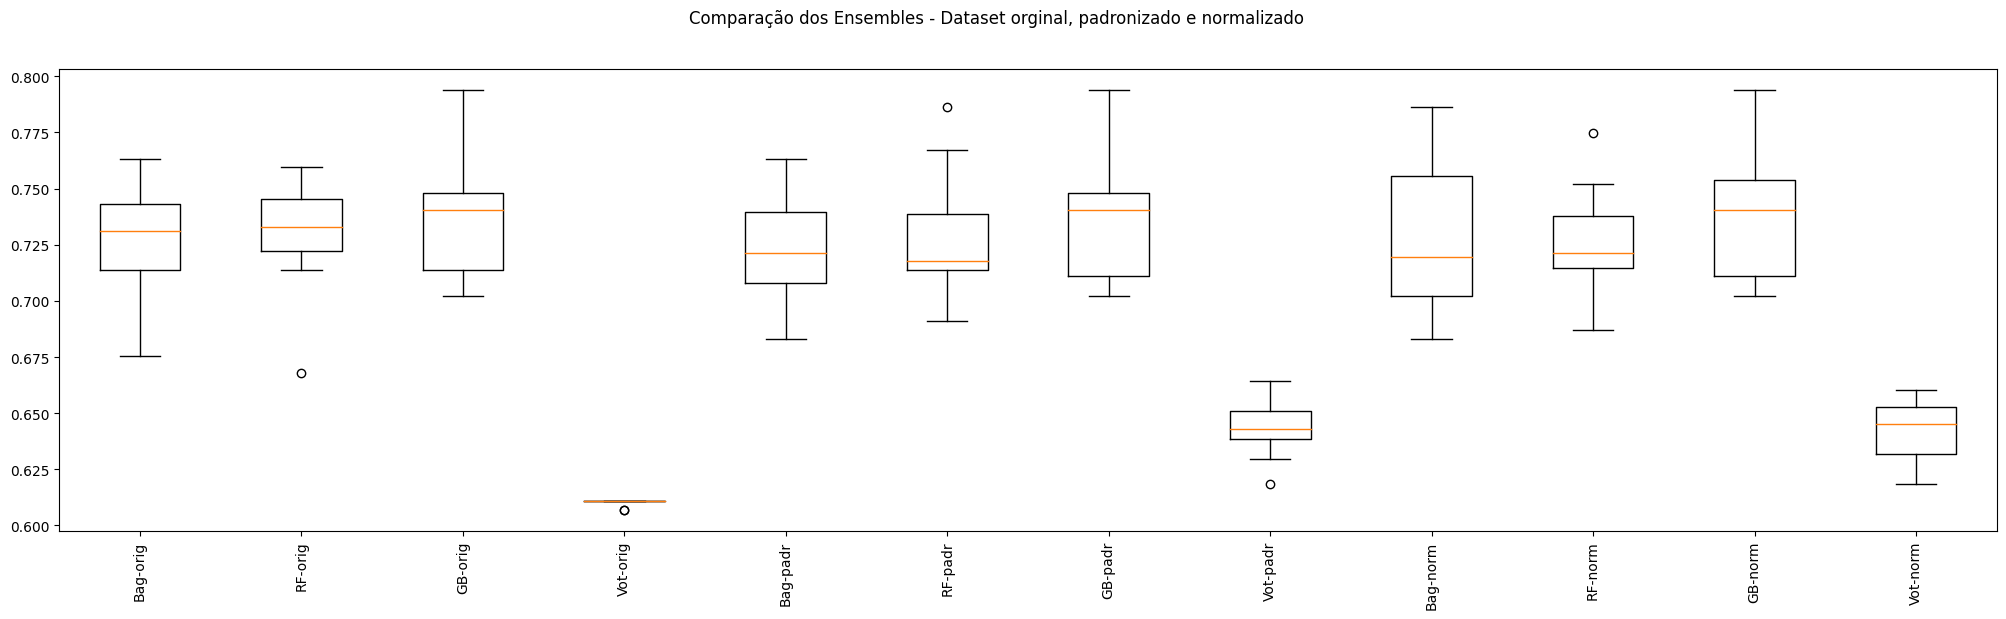

In [93]:
#Avaliação de desempenho das pipelines dos ensembles

avalia_pipelines_ensembles(X_train, y_train)

Apenas no desempenho do Voting houve uma mudança significativa.

#### **5. 4. 3. Avaliação com Eliminação Recursiva de atributos**

In [94]:
# Separação dos dados de treino e teste

test_size = 0.20 # tamanho do conjunto de teste, 20% dos dados irão para o conjunto de teste
seed = 10 # semente aleatória

# xERA = atributos selecionados pela Eliminação Recursiva
X_train, X_test, y_train, y_test = train_test_split(xERA, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

LR: 0.609924 (0.001527)
KNN: 0.622519 (0.025171)
CART: 0.741603 (0.019391)
NB: 0.624046 (0.017512)
SVM: 0.609924 (0.001527)
SGD: 0.566412 (0.085741)


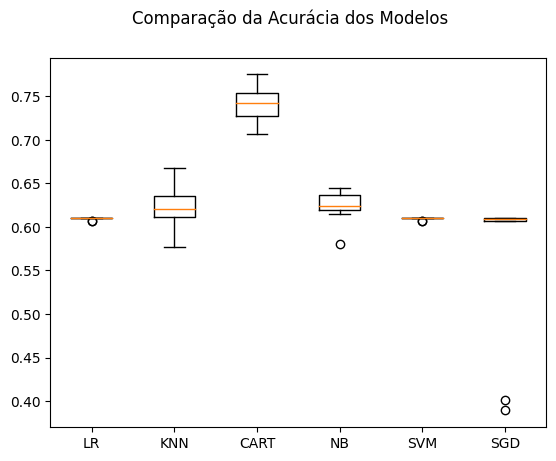

In [95]:
#Avaliação de desempenho dos modelos

avalia_modelos(X_train, y_train)

Com a Eliminação Recursiva de atributos, vemos um aumento na acurácia dos modelos Árvore de Decisão (74%), KNN (62%) e SGD (56%) em relação a avaliação dos atributos originais.

Bagging: 0.774046 (0.029158)
RFC: 0.785496 (0.025075)
GB: 0.784351 (0.028524)
Voting: 0.609924 (0.001527)


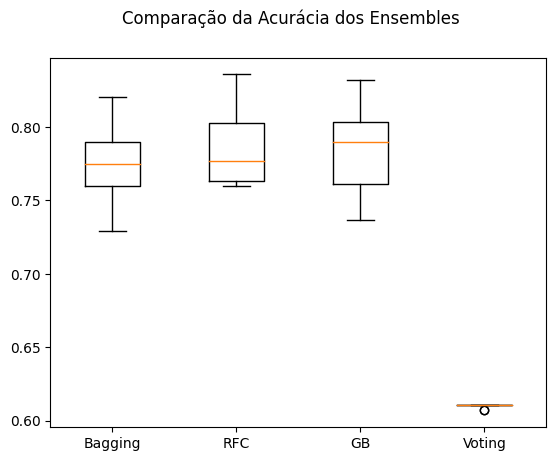

In [96]:
#Avaliação de desempenho dos ensembles

avalia_ensembles(X_train, y_train)

Em relação ao desempenho dos ensembles, a acurácia se manteve semelhante a dos atributos originais.

LR-orig: 0.609924 (0.001527)
KNN-orig: 0.622519 (0.025171)
CART-orig: 0.741603 (0.019391)
NB-orig: 0.624046 (0.017512)
SVM-orig: 0.609924 (0.001527)
SGD-orig: 0.566412 (0.085741)
LR-padr: 0.609924 (0.001527)
KNN-padr: 0.624427 (0.020066)
CART-padr: 0.739695 (0.019297)
NB-padr: 0.624046 (0.017512)
SVM-padr: 0.667939 (0.016549)
SGD-padr: 0.600000 (0.015532)
LR-norm: 0.609924 (0.001527)
KNN-norm: 0.623664 (0.020497)
CART-norm: 0.733206 (0.023618)
NB-norm: 0.624046 (0.017512)
SVM-norm: 0.664885 (0.015994)
SGD-norm: 0.580534 (0.066008)


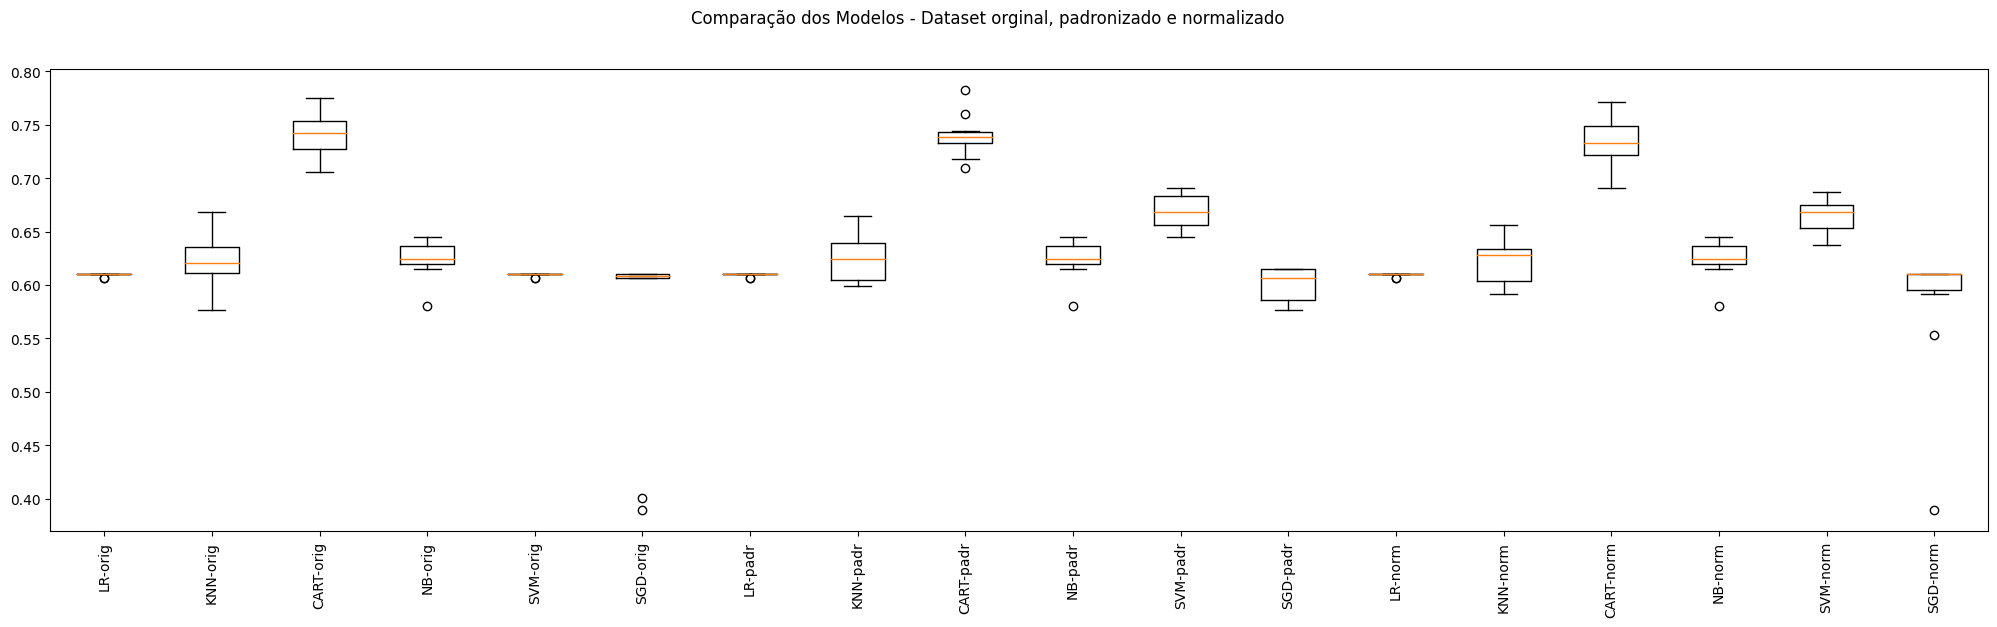

In [97]:
#Avaliação de desempenho das pipelines dos modelos

avalia_pipelines_modelos(X_train, y_train)

Com a normalização/padronização dos modelos, a acurácia se manteve semelhante a dos atributos originais.

Bag-orig: 0.774046 (0.029158)
RF-orig: 0.785496 (0.025075)
GB-orig: 0.784733 (0.029869)
Vot-orig: 0.609924 (0.001527)
Bag-padr: 0.777863 (0.027300)
RF-padr: 0.780534 (0.031624)
GB-padr: 0.783969 (0.030063)
Vot-padr: 0.671374 (0.008779)
Bag-norm: 0.770611 (0.024821)
RF-norm: 0.782824 (0.030603)
GB-norm: 0.784733 (0.030353)
Vot-norm: 0.669847 (0.006213)


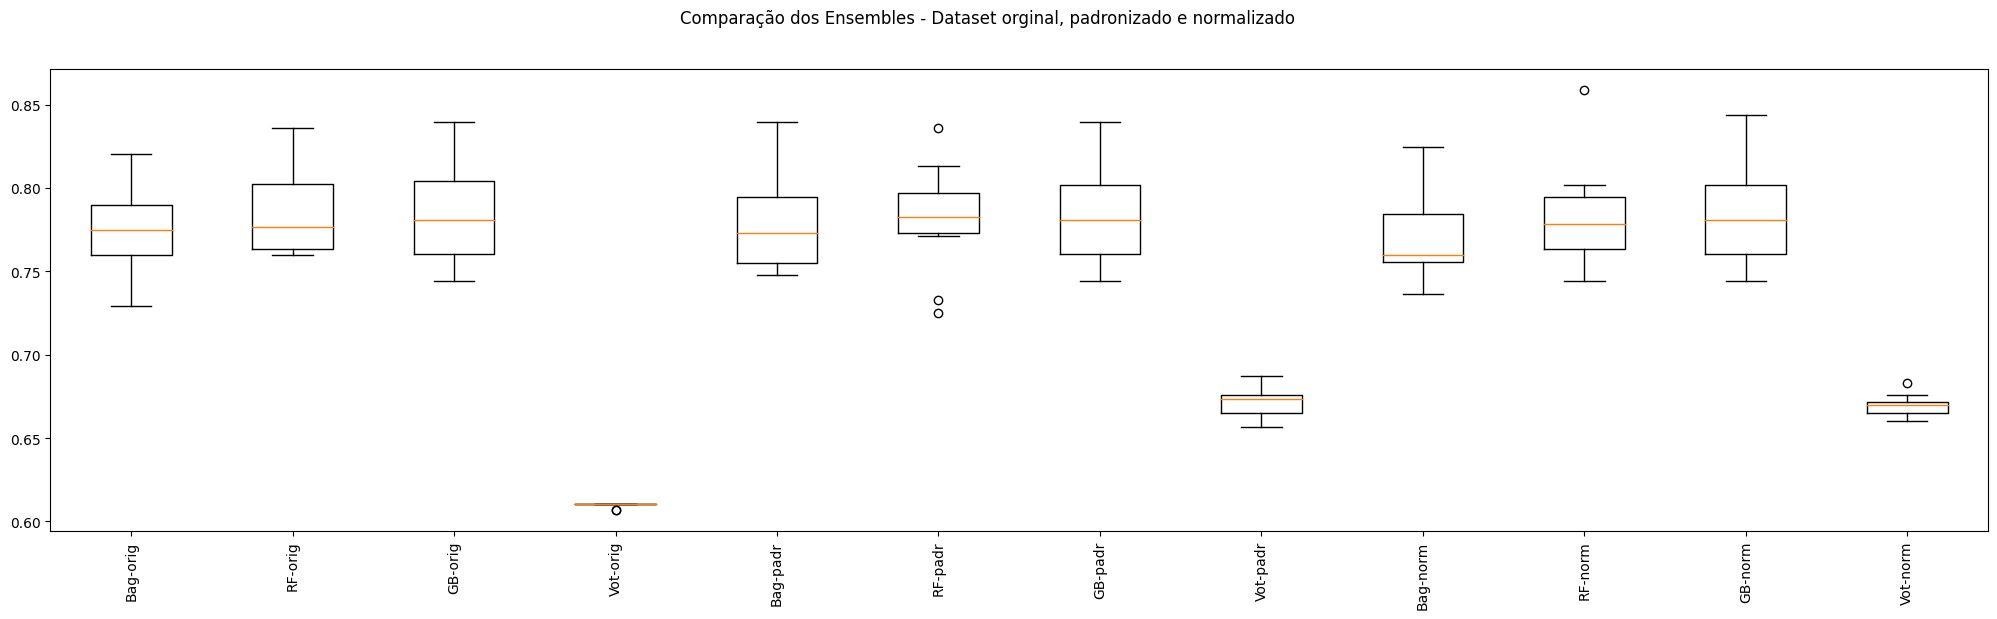

In [98]:
#Avaliação de desempenho das pipelines dos ensembles

avalia_pipelines_ensembles(X_train, y_train)

Com a normalização/padronização dos ensembles, a acurácia se manteve semelhante a dos atributos originais.

## **6. Avaliação de resultados**

### **6.1. Seleção do modelo final**

Após a avaliação dos modelos realizada para cada feature selection diferente,  iremos avaliar os resultados e selecionar o caso com o melhor desempenho para a criação do modelo final.

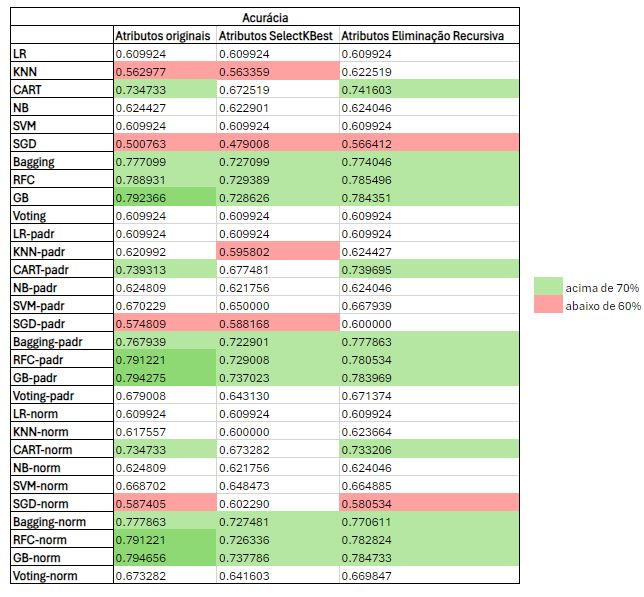

Na tabela acima, podemos vizualizar a acurácia de todos os modelos avaliados em diferentes casos. Em geral, os modelos com os melhores desempenhos foram Árvore de decisão (CART), Bagging, Random Forest (RFC) e Gradient Boosting (GB). Os modelos que apresentaram o pior desempenho foram SGD e KNN. Podemos também observar que a acurácia dos modelos foram melhores no caso em que utilizamos todos os atributos do dataset. A padronização e normalização dos dados na maioria dos casos, fez com que a o desempenho do modelo melhorasse, porém houve casos em que a acurácia diminuiu.

O modelo final selecionado, com a maior acurácia de 0.794656, foi o Gradient Boosting (GB) normalizado, utilizando os atributos originais do dataset.

### **6.2. Otimização dos hiperparâmetros**

A otimização dos hiperparâmetros é essencial para maximizar o desempenho dos modelos de machine learning. Ela envolve a busca pelo conjunto ideal de valores para os parâmetros que afetam o comportamento do modelo, resultando em modelos mais precisos, eficientes e interpretáveis.

Nesta seção, iremos buscar pelo conjunto ideal de valores para os parâmetros do modelo Gradient Boosting, com os atributos originais do dataset e com os valores normalizados.

In [99]:
# Separação dos dados de treino e teste

test_size = 0.20 # tamanho do conjunto de teste, 20% dos dados irão para o conjunto de teste
seed = 10 # semente aleatória

# X = atributos originais do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

In [100]:
np.random.seed(seed)

pipelines = []

# Definindo os componentes do pipeline
gradient_boosting = ('GradientBoosting', GradientBoostingClassifier())
#standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
#pipelines.append(('gb-orig', Pipeline(steps=[gradient_boosting])))
#pipelines.append(('gb-padr', Pipeline(steps=[standard_scaler, gradient_boosting])))
pipelines.append(('gb-norm', Pipeline(steps=[min_max_scaler, gradient_boosting])))

param_grid = {
    'GradientBoosting__n_estimators': [50, 100, 200],
    'GradientBoosting__learning_rate': [0.01, 0.1, 0.5],
    'GradientBoosting__max_depth': [3, 5, 7],
}

# Prepara e executa o GridSearchCV
for name, ensemble in pipelines:
    grid = GridSearchCV(estimator=ensemble, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Sem tratamento de missings: gb-norm - Melhor: 0.795420 usando {'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 3, 'GradientBoosting__n_estimators': 200}


### **6.3. Construção do modelo final**

Em seguida, iremos treinar o modelo final utilizando os valores ideais de hiperparâmetros encontrados na seção anterior. Após o treinamento do modelo, iremos calcular sua acurácia.

In [101]:
# Modelo com os melhores parâmetros (resultado da otimização de hiperparametros)
model = GradientBoostingClassifier(learning_rate=0.1,
                                   max_depth=3,
                                   n_estimators=200)

scaler = MinMaxScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model.fit(rescaledX, y_train) # treina o modelo


# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7942073170731707


A acurácia final do modelo foi de 79%

### **6.4. Simulação do modelo em dados não vistos**

Por fim, iremos utilizar o modelo para classificar dados não vistos anteriormente, os quais a classe é desconhecida.

In [102]:
# Novos dados - não sabemos a classe!
data = {'pH':  [7.2, 6, 1.5, 5.5],
        'Hardness': [150, 150, 450, 220],
        'Solids': [8800, 11203, 6600, 12001],
        'Chloramines': [1.5, 7, 9, 2.5],
        'Sulfate': [150, 340, 300, 360],
        'Conductivity': [500, 550, 600, 600],
        'Organic_carbon': [10, 15, 12, 20],
        'Trihalomethanes': [20, 59, 65, 30],
        'Turbidity': [5, 2, 5, 8]
        }

atributos = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:9].astype(float)

# Normalização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.515  0.288  0.174 -0.09  -0.246  0.642  0.287  0.009  0.72 ]
 [ 0.382  0.288  0.224  0.468  0.541  0.749  0.543  0.42   0.077]
 [-0.117  1.836  0.129  0.671  0.375  0.857  0.39   0.483  0.72 ]
 [ 0.326  0.649  0.24   0.011  0.623  0.857  0.798  0.114  1.363]]


In [103]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 0. 1.]


## **7. Conclusão**

Este projeto de machine learning buscou desenvolver um modelo para prever a potabilidade da água com base em diversas características físico-químicas. Inicialmente, os dados foram submetidos ao processo de pré-processamento, incluindo tratamento de valores ausentes e de outliers. Em seguida, várias abordagens de modelagem foram exploradas, incluindo o uso de pipelines, padronização e normalização dos dados e a aplicação de técnicas para a otimização de hiperparâmetros.

Para avaliar a performance dos modelos, utilizamos uma abordagem de validação cruzada k-fold, que nos permitiu treinar e testar o modelo em múltiplas divisões dos dados. Isso proporcionou uma avaliação robusta do desempenho do modelo e ajudou a evitar overfitting. Após a validação cruzada, identificamos o modelo final que apresentou a melhor performance em um conjunto de dados de teste separado.

Os resultados mostraram que o modelo final, construído usando um algoritmo de Gradient Boosting, alcançou uma precisão média de 79% na previsão da potabilidade da água.

Em resumo, este projeto demonstrou a eficácia de técnicas avançadas de machine learning, incluindo pipelines, validação cruzada e otimização de hiperparâmetros, na construção de um modelo preciso e confiável para prever a potabilidade da água.